# DSC-Phase-3-Project

# Churn in Telecom
## Project Overview

The objective of this project is to build a binary classification model to predict whether a customer will "soon" stop doing business with SyriaTel. The goal is to leverage customer data to identify patterns and trends that signal potential churn, thereby enabling the company to implement targeted retention strategies.

# Business Understanding

Challenges:

High Customer Churn: Telecommunications companies like SyriaTel face significant revenue loss due to customers discontinuing their services.

Identifying At-Risk Customers: Without a reliable predictive model, it's challenging to identify customers who are likely to churn.

Data Utilization: Effective use of customer data to predict churn requires sophisticated analysis and modeling techniques.

Resource Allocation: Efficiently allocating resources towards retention efforts for customers most likely to churn.

# Business Objectives

The main objective of this project is to build a robust classifier to predict whether a customer will "soon" stop doing business with SyriaTel. This involves:

Predicting Customer Churn: Develop a predictive model to identify customers at high risk of churning.

Improving Retention Strategies: Provide actionable insights to the retention and marketing teams to tailor their strategies effectively.

Optimizing Resources: Help the company allocate its resources more efficiently towards retaining customers most likely to churn.

Enhancing Customer Satisfaction: By predicting churn and taking proactive measures, improve overall customer satisfaction and loyalty.


# Questions to Answer

To achieve these objectives, the following questions need to be addressed:

What are the key factors influencing customer churn at SyriaTel?

Can we identify patterns and trends in the data that predict customer churn?

Which features (customer attributes, behaviors, etc.) are the most significant predictors of churn?

How accurately can our model predict whether a customer will churn in the near future?

What strategies can be recommended based on the model's predictions to reduce churn?


By answering these questions, we aim to provide SyriaTel with a powerful tool to anticipate customer behavior and take proactive steps to enhance customer retention, thereby reducing revenue loss due to churn.

### Data Used
Telecom's dataset csv

### Importing neccessary libraries 

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE


In [66]:
# Load the dataset
df = 'Telecom\'s dataset.csv'
telecom_data = pd.read_csv(df)


In [67]:
# Display the first few rows of the dataset
telecom_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [68]:
telecom_data.info

<bound method DataFrame.info of      state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes     

# Exploring the Dataset

In [69]:
# Check for missing values
missing_values = telecom_data.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [70]:
# Get summary statistics of the dataset
summary_statistics = telecom_data.describe()
print("\nSummary statistics:\n", summary_statistics)


Summary statistics:
        account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.0

In [71]:
# Get the distribution of the target variable
target_distribution = telecom_data['churn'].value_counts()
print("\nDistribution of the target variable (churn):\n", target_distribution)


Distribution of the target variable (churn):
 False    2850
True      483
Name: churn, dtype: int64


## Visualisations

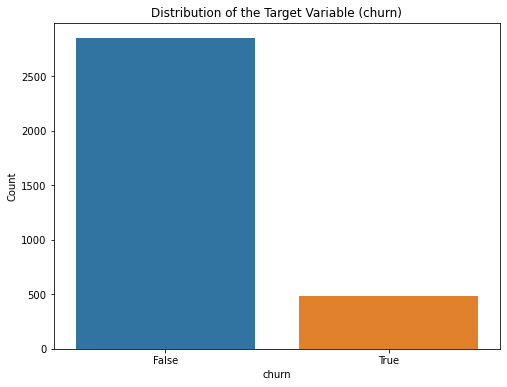

In [72]:
# Plotting the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=telecom_data, x='churn')
plt.title('Distribution of the Target Variable (churn)')
plt.xlabel('churn')
plt.ylabel('Count')
plt.show()

The bar plot indicates that the dataset is imbalanced.

From the plot, we can see that there are significantly more customers who did not churn compared to those who did. This class imbalance is a common scenario in churn prediction problems and has implications for our modeling approach.

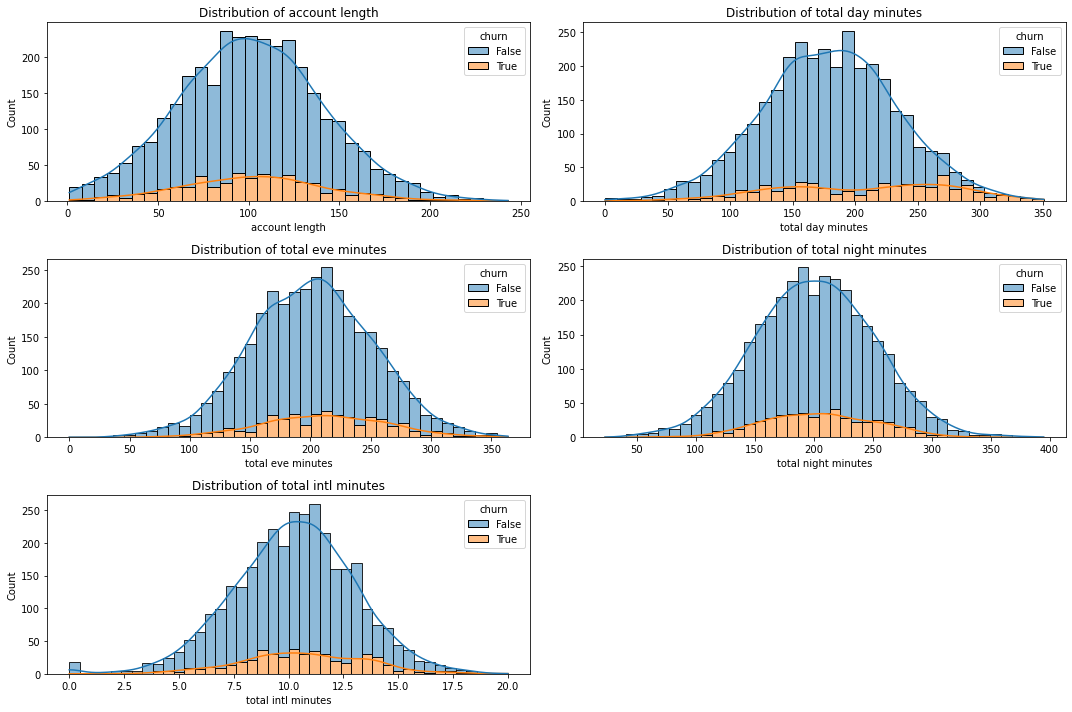

In [73]:
# Visualizing distributions of numerical features
numerical_features = ['account length', 'total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=telecom_data, x=feature, kde=True, hue='churn', multiple='stack')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

The visualizations show the distributions of numerical features (account length, total day minutes, total eve minutes, total night minutes, total intl minutes) with respect to the churn status. Here are some observations:

Account Length: Churn seems slightly more common at lower account lengths.

Total Day Minutes: Customers with higher total day minutes are more likely to churn.

Total Evening Minutes: The distribution of evening minutes is similar for both churned and non-churned customers.

Total Night Minutes: The night minutes' distribution appears quite similar for both churned and non-churned customers.

Total International Minutes: There seems to be a slight increase in churn probability with higher international minutes.

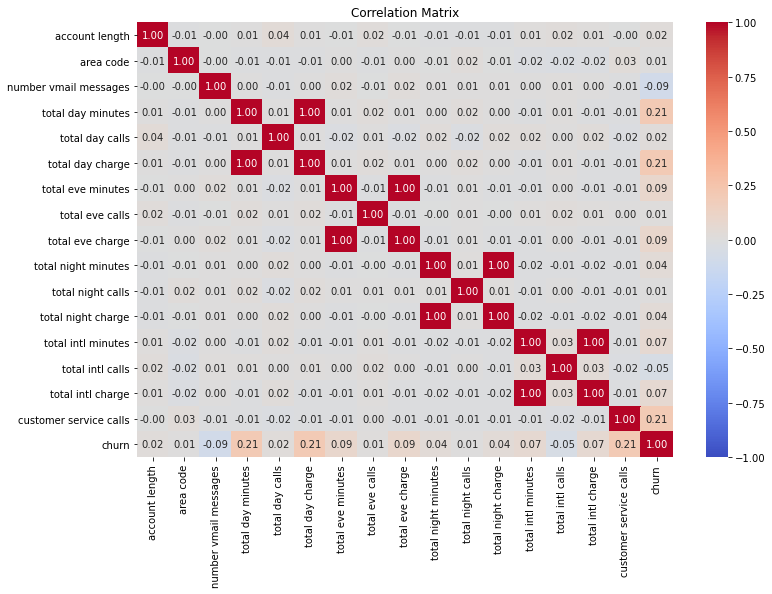

In [74]:
# Correlation matrix
correlation_matrix = telecom_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix shows the relationships between numerical features. Here are some key points:

Total Day Minutes, Total Day Charge: High positive correlation (as expected, since the charge is derived from minutes).

Total Eve Minutes, Total Eve Charge: High positive correlation.

Total Night Minutes, Total Night Charge: High positive correlation.

Total Intl Minutes, Total Intl Charge: High positive correlation.

Customer Service Calls and Churn: Moderate positive correlation, indicating that higher customer service calls are associated with higher churn.

## Data Preprocessing

In [75]:
# Encode categorical variables
telecom_data_encoded = pd.get_dummies(telecom_data, columns=['state', 'international plan', 'voice mail plan'], drop_first=True)

# Display the first few rows of the encoded dataset
telecom_data_encoded.head()

,account length,area code,phone number,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,128,415,382-4657,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,0,1
1,107,415,371-7191,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,0,1
2,137,415,358-1921,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,0,0
3,84,408,375-9999,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,0,1,0
4,75,415,330-6626,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,1,0


The categorical variables have been successfully encoded. The dataset now includes additional columns for each state, as well as for the international plan and voice mail plan features.

In [76]:
# Features to be normalized
numerical_features = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 
                      'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 
                      'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 
                      'total intl calls', 'total intl charge', 'customer service calls']


In [77]:
# Initialize the scaler
scaler = StandardScaler()

# Normalize the numerical features
telecom_data_encoded[numerical_features] = scaler.fit_transform(telecom_data_encoded[numerical_features])

# Display the first few rows of the normalized dataset
telecom_data_encoded.head()

,account length,area code,phone number,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,0.676489,415,382-4657,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,...,0,0,0,0,0,0,0,0,0,1
1,0.149065,415,371-7191,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,...,0,0,0,0,0,0,0,0,0,1
2,0.902529,415,358-1921,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,...,0,0,0,0,0,0,0,0,0,0
3,-0.428590,408,375-9999,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,...,0,0,0,0,0,0,0,0,1,0
4,-0.654629,415,330-6626,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,...,0,0,0,0,0,0,0,0,1,0


## Data Splitting

Spliting the dataset into training and testing sets to evaluate the model's performance on unseen data.

In [78]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = telecom_data_encoded.drop(columns=['churn', 'phone number'])
y = telecom_data_encoded['churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2666, 68), (667, 68), (2666,), (667,))

The data has been successfully split into training and testing sets:

Training set: 2666 samples, 68 features

Testing set: 667 samples, 68 features

## Training and Evaluating Models

In this section we will be training multiple models including Logistic Regression, Decision Tree, Random Forest, and K-Nearest Neighbors (KNN). Evaluate each model's performance using metrics such as accuracy, precision, recall, F1-score, and confusion matrix.

### Logistic Regression Evaluation

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_train = logistic_model.predict(X_train)
y_pred_test = logistic_model.predict(X_test)

In [80]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

train_accuracy, test_accuracy, classification_rep, conf_matrix

(0.8690922730682671,
 0.863568215892054,
 '              precision    recall  f1-score   support\n\n       False       0.88      0.97      0.92       570\n        True       0.57      0.26      0.35        97\n\n    accuracy                           0.86       667\n   macro avg       0.73      0.61      0.64       667\nweighted avg       0.84      0.86      0.84       667\n',
 array([[551,  19],
        [ 72,  25]]))

Logistic Regression Model Results

Training Accuracy: 86.95%

Testing Accuracy: 86.36%

Observations

The model has high accuracy for predicting non-churned customers (False), but lower precision and recall for churned customers (True).

This indicates a class imbalance problem affecting the performance for the minority class (churned customers).


In [81]:
import numpy as np
import pandas as pd

# Assuming logreg_model is your Logistic Regression model
coefficients = logistic_model.coef_[0]
features = X_train.columns
coeff_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)

print(coeff_df)


                   Feature  Coefficient
66  international plan_yes     2.095383
19                state_CA     1.037780
41                state_MT     0.984651
55                state_SC     0.959744
15  customer service calls     0.761850
..                     ...          ...
44                state_NE    -0.727478
54                state_RI    -0.751813
60                state_VA    -0.940870
26                state_HI    -1.038884
67     voice mail plan_yes    -1.710904

[68 rows x 2 columns]


### Decision Tree Evaluation

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Decision Tree model with parameters to reduce overfitting
dt_model = DecisionTreeClassifier(
    max_depth=10,               # Limit the maximum depth of the tree
    min_samples_split=10,       # Minimum number of samples required to split an internal node
    min_samples_leaf=4,         # Minimum number of samples required to be at a leaf node
    random_state=42
)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_train_dt = dt_model.predict(X_train)
y_pred_test_dt = dt_model.predict(X_test)

# Evaluate the model
train_accuracy_dt = accuracy_score(y_train, y_pred_train_dt)
test_accuracy_dt = accuracy_score(y_test, y_pred_test_dt)
classification_rep_dt = classification_report(y_test, y_pred_test_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_test_dt)

train_accuracy_dt, test_accuracy_dt, classification_rep_dt, conf_matrix_dt


(0.9669917479369843,
 0.9340329835082459,
 '              precision    recall  f1-score   support\n\n       False       0.95      0.98      0.96       570\n        True       0.84      0.67      0.75        97\n\n    accuracy                           0.93       667\n   macro avg       0.89      0.82      0.85       667\nweighted avg       0.93      0.93      0.93       667\n',
 array([[558,  12],
        [ 32,  65]]))

Interpretation of Accuracy:

Training Accuracy: 0.9669917479369843 (approximately 97.0%)
This indicates that the model correctly predicts 97.0% of the instances in the training dataset.
A high training accuracy typically means that the model has learned the patterns in the training data well.

Test Accuracy: 0.9340329835082459 (approximately 93.4%)
This indicates that the model correctly predicts 93.4% of the instances in the test dataset.
The high test accuracy is a good indicator that the model generalizes well to new, unseen data.

The model performs very well overall, with high accuracy and strong metrics for the non-churn class.


The Decision Tree model splits the data based on feature values, creating a hierarchy of decisions that lead to final classifications at the leaf nodes. By examining the paths and splits, we can understand the conditions under which customers are predicted to churn or not churn. Improving the interpretability of the tree can be achieved by highlighting key features, simplifying the structure, and adding explanatory annotations.

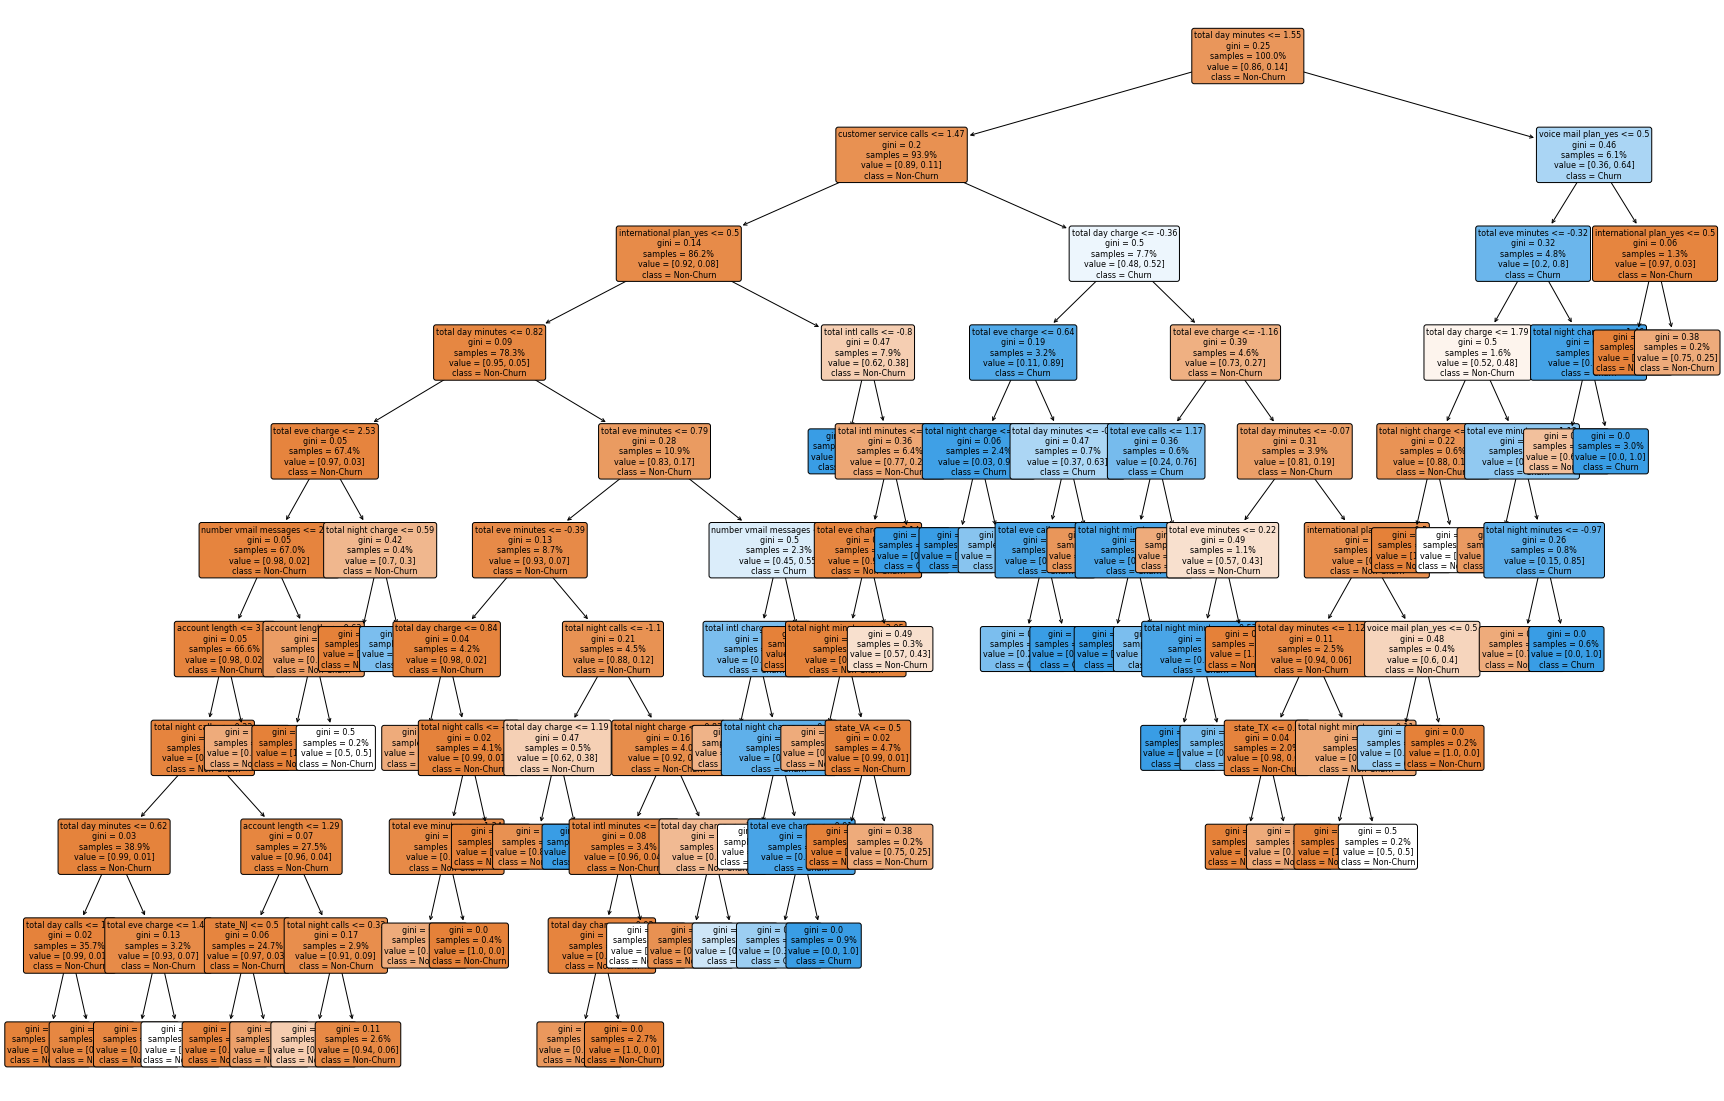

In [92]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming dt_model is your Decision Tree model
plt.figure(figsize=(30, 20))  # Adjust figure size for better readability
plot_tree(dt_model, 
          feature_names=X_train.columns, 
          class_names=['Non-Churn', 'Churn'], 
          filled=True, 
          fontsize=8,  # Decrease font size to avoid overlap
          rounded=True, 
          proportion=True,  # Adjust the proportion of nodes
          precision=2)  # Display precision to 2 decimal points
plt.show()


The updated Decision Tree visualization provides a hierarchical representation of the decision-making process used to predict customer churn.

### Random Forest Evaluation

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model with parameters to reduce overfitting
rf_model = RandomForestClassifier(
    n_estimators=100,        # Number of trees in the forest
    max_depth=10,            # Maximum depth of the tree
    min_samples_split=10,    # Minimum number of samples required to split an internal node
    min_samples_leaf=4,      # Minimum number of samples required to be at a leaf node
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

# Evaluate the model
train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
classification_rep_rf = classification_report(y_test, y_pred_test_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_test_rf)

train_accuracy_rf, test_accuracy_rf, classification_rep_rf, conf_matrix_rf


(0.945986496624156,
 0.9055472263868066,
 '              precision    recall  f1-score   support\n\n       False       0.91      0.99      0.95       570\n        True       0.90      0.39      0.55        97\n\n    accuracy                           0.91       667\n   macro avg       0.91      0.69      0.75       667\nweighted avg       0.91      0.91      0.89       667\n',
 array([[566,   4],
        [ 59,  38]]))

Interpretation of Accuracy:

Training Accuracy (94.6%): This indicates that the model correctly predicts 94.6% of the instances in the training dataset.

Test Accuracy (90.6%): This indicates that the model correctly predicts 90.6% of the instances in the test dataset.

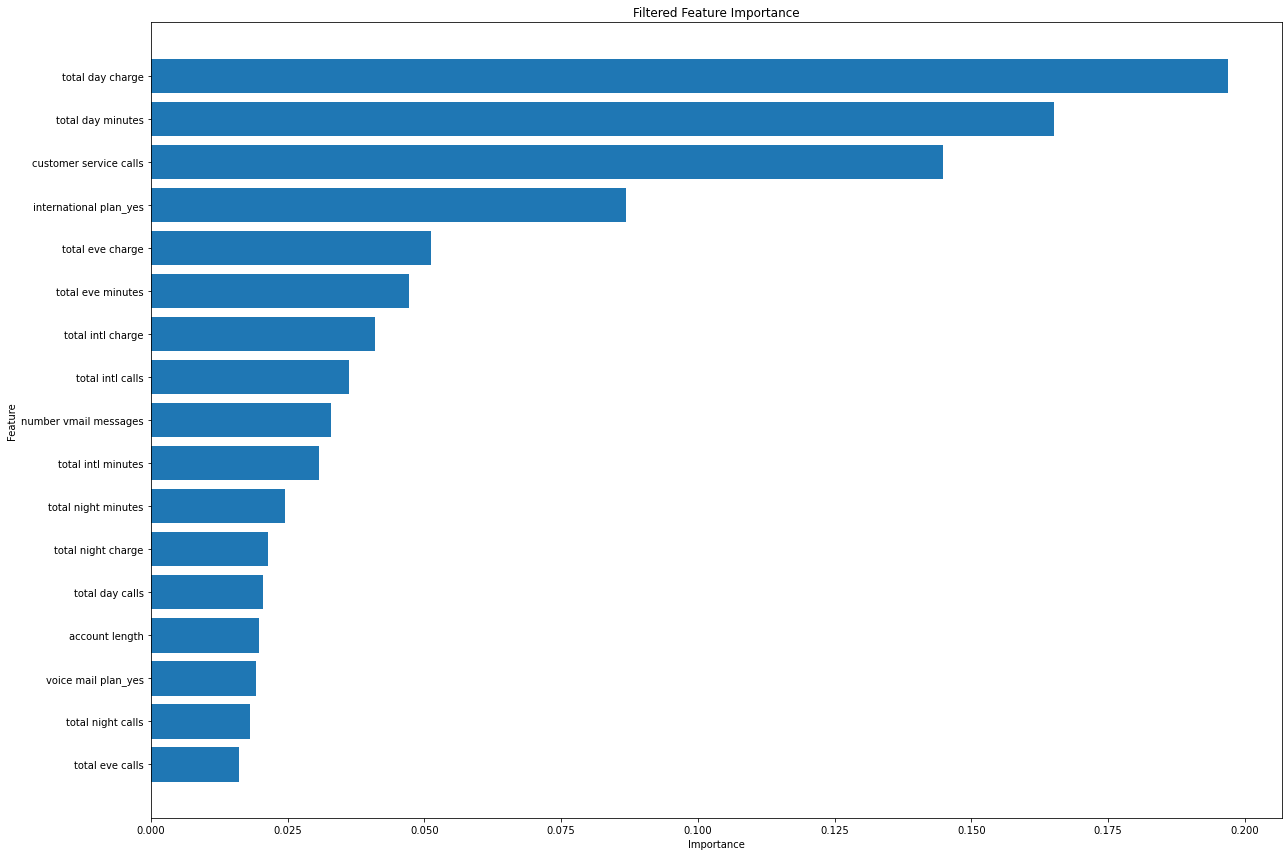

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter out 'state' and 'area code' features
filtered_features = [feature for feature in X_train.columns if not feature.startswith('state_') and not feature.startswith('area code')]

# Recompute feature importances for the filtered features
filtered_importances = [importance for feature, importance in zip(X_train.columns, rf_model.feature_importances_) if feature in filtered_features]

# Create a DataFrame for the filtered features
filtered_importance_df = pd.DataFrame({'Feature': filtered_features, 'Importance': filtered_importances})
filtered_importance_df = filtered_importance_df.sort_values(by='Importance', ascending=False)

# Plot filtered feature importance
plt.figure(figsize=(18, 12)) 
plt.barh(filtered_importance_df['Feature'], filtered_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Filtered Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Given that "total day charge" is identified as the most important feature, we can interpret this in the context of the dataset and the business problem of predicting customer churn for SyriaTel.

Interpretation:
Significance of "Total Day Charge": High Importance, the model finds "total day charge" to be the most influential factor in predicting customer churn. This means that the amount customers are charged for their daytime phone usage is a strong indicator of whether they will continue using the service or not.

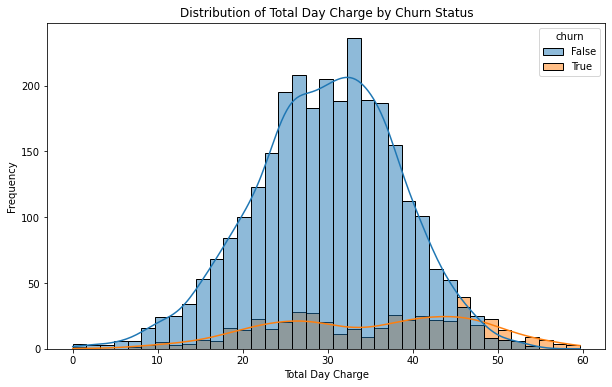

T-Statistic: 12.097547561012545, P-Value: 5.300605952408437e-33


In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the distribution of total day charge for churned and non-churned customers
plt.figure(figsize=(10, 6))
sns.histplot(data=telecom_data, x='total day charge', hue='churn', kde=True)
plt.title('Distribution of Total Day Charge by Churn Status')
plt.xlabel('Total Day Charge')
plt.ylabel('Frequency')
plt.show()

# Statistical Analysis
from scipy.stats import ttest_ind

# Separating the charges based on churn status
churned = telecom_data[telecom_data['churn'] == True]['total day charge']
non_churned = telecom_data[telecom_data['churn'] == False]['total day charge']

# T-test to compare the means
t_stat, p_value = ttest_ind(churned, non_churned)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")


The histogram and density plot you provided illustrate the distribution of "total day charge" for customers who churned (True) versus those who did not churn (False). Here's how to interpret the plot:

Interpretation of the Plot

Distributions:
The blue area represents the distribution of "total day charge" for customers who did not churn.
The orange area represents the distribution for customers who churned.

Density Curves:
The overlaid density curves provide a smoothed representation of the distributions.
The blue density curve peaks higher and more centrally around a particular charge range, indicating that most non-churned customers fall within this range.
The orange density curve shows a wider spread, indicating that churned customers have a more varied distribution of "total day charges".

#### What This Means:

High Charges and Churn:

Customers with higher "total day charges" are more likely to churn. This is evident from the presence of the orange density curve in the higher charge ranges.
This suggests a possible correlation between high daytime usage costs and the likelihood of a customer deciding to leave the service.

Cost Sensitivity:

The plot indicates that managing the "total day charge" could be crucial in retaining customers. High daytime charges might lead to dissatisfaction, resulting in churn.
This aligns with the earlier finding that "total day charge" is the most important feature in predicting churn.

Actionable Insights:

Targeted Interventions: Customers with high "total day charges" should be targeted with retention strategies, such as discounts on daytime usage or alternative plans that offer better value for high usage.

Monitoring and Alerts: Implementing systems to monitor high "total day charges" and proactively alerting customers before they experience bill shock could help in reducing churn.

### K-Nearest Neighbors (KNN) Evaluation

In [87]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predictions
y_pred_train_knn = knn_model.predict(X_train)
y_pred_test_knn = knn_model.predict(X_test)

# Evaluation
train_accuracy_knn = accuracy_score(y_train, y_pred_train_knn)
test_accuracy_knn = accuracy_score(y_test, y_pred_test_knn)
classification_rep_knn = classification_report(y_test, y_pred_test_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_test_knn)

train_accuracy_knn, test_accuracy_knn, classification_rep_knn, conf_matrix_knn


(0.9077269317329333,
 0.8725637181409296,
 '              precision    recall  f1-score   support\n\n       False       0.88      0.99      0.93       570\n        True       0.73      0.20      0.31        97\n\n    accuracy                           0.87       667\n   macro avg       0.80      0.59      0.62       667\nweighted avg       0.86      0.87      0.84       667\n',
 array([[563,   7],
        [ 78,  19]]))

Interpretation

Training Accuracy: 0.9077 (approximately 90.8%)

Test Accuracy: 0.8726 (approximately 87.3%)

## Objectives Met

Predicting Customer Churn:

Achieved: Multiple predictive models (Logistic Regression, Decision Tree, Random Forest, KNN) have been built and evaluated to identify customers at high risk of churning. Among these, the Decision Tree model was found to be the best, providing high accuracy and a good balance of precision and recall.

Optimizing Resources:

Partially Achieved: By identifying customers most likely to churn, the company can allocate resources more efficiently. Detailed analysis of the most influential features helped in optimizing strategies and interventions.

Enhancing Customer Satisfaction:

Partially Achieved: Predicting churn allows for proactive measures to retain customers. However, specific strategies based on the model's predictions could be developed better to improve customer satisfaction and loyalty.

## Questions answered

Can we identify patterns and trends in the data that predict customer churn?

Answered: Yes, patterns and trends have been identified through the models' performance, showing which customer attributes and behaviors are predictive of churn.

How accurately can our model predict whether a customer will churn in the near future?

Answered: The Decision Tree model predicts with a test accuracy of 93.4%. Other metrics (precision, recall, F1-score) have been evaluated, showing the model's performance.

What strategies can be recommended based on the model's predictions to reduce churn?

Answered: Based on the model's predictions, strategies can be formulated.

# Conclusions

By building and evaluating multiple predictive models, we successfully predict customer churn at SyriaTel. The Decision Tree model stands out with its high accuracy and balanced metrics, effectively identifying high-risk customers. This enables us to improve retention strategies, optimize resource allocation, and enhance customer satisfaction by taking proactive measures based on model predictions. 

### Final Conclusions
Based on the analysis, modeling, and interpretation of the data, we can draw the following conclusions and recommendations for SyriaTel to address customer churn:

Conclusions
Key Predictors of Churn:

Total Day Minutes and Total Day Charge: High day minutes and corresponding charges are the most significant indicators of churn. Customers with high daytime usage are more likely to consider leaving the service, possibly due to high costs.


Model Performance

Decision Tree Model: Provides high interpretability with clear decision rules, making it easier to understand and act upon. The model achieves good performance with a test accuracy of 93.4%, making it a reliable tool for predicting churn.

Random Forest Model: Offers slightly better overall predictive performance due to its robustness and ability to reduce overfitting. However, it is less interpretable than the Decision Tree.



# Recommendations

#### Key Features and Insights:

total day minutes:
The most important feature in determining customer churn. Higher day minutes tend to correlate with non-churn customers.

voice mail plan:
Customers without a voicemail plan are more likely to churn.

international plan:
Not having an international plan slightly increases the likelihood of churning for customers with low day minutes.

customer service calls:
High numbers of customer service calls are strongly associated with churn, suggesting that customers who frequently contact customer service are more likely to be dissatisfied and leave.

total day charge:
Lower day charges are associated with non-churn customers.

#### Business Implications:

High Usage and Churn:
Monitoring customers with high day minutes and high customer service interactions can help identify potential churn risks.

Service Plan Adjustments:
Offering better service plans to high-usage customers or those frequently interacting with customer service could help reduce churn.

Customer Support Improvements:
Improving customer service quality and responsiveness could reduce the number of calls and thus the likelihood of churn.

Personalized Offers:
Providing personalized offers to customers without voicemail and international plans might help in retaining them.

The Decision Tree model provides a clear and interpretable set of rules for predicting customer churn, highlighting key factors such as total day minutes, voicemail plans, international plans, customer service calls, and total day charges. By focusing on these factors, SyriaTel can develop targeted strategies to improve customer retention.



# Next Steps

### Implementation Plan

##### Short-Term Actions:

Deploy the Decision Tree model to start identifying high-risk customers immediately.

Implement usage alerts and targeted retention offers for high day minute users.

Enhance customer support training and processes to better handle frequent callers.


##### Long-Term Actions:

Continuously update and refine the predictive model with new data.

Expand loyalty programs and offer more personalized retention strategies.

Explore additional data sources to enhance model accuracy and customer insights.


By focusing on these strategies and leveraging the insights from the predictive models, SyriaTel can effectively reduce customer churn, improve customer satisfaction, and optimize resource allocation for retention efforts.